# Вычисляем продолжительность дня

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
!unzip WeatherData.zip

Archive:  WeatherData.zip
  inflating: WeatherData.CSV         


In [9]:
df=pd.read_csv('WeatherData.CSV',skiprows=range (1,5))
df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,frame,time,temp,a1,temp_pres,pressure,altitude,humidity,temp_hum
0,4,3033,9.00,950,2.3,99384,163.04,22.5,9.3
1,5,3645,9.00,951,2.3,99385,162.87,22.5,9.3
2,6,4257,8.94,950,2.2,99391,162.19,22.5,9.3
3,7,4869,8.94,951,2.2,99381,162.87,22.5,9.3
4,8,5484,8.88,952,2.2,99379,163.55,23.9,8.9


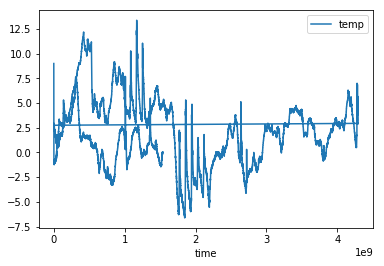

In [10]:
df1 = df[::100]
df1.plot('time','temp')

In [18]:
time_reset_pos = next(filter(lambda x:x>100,df.index[df['time']<10000].tolist()))
print(time_reset_pos)
df.iloc[time_reset_pos:]['time'] = df.iloc[time_reset_pos:]['time']+2**32
df.iloc[time_reset_pos]


3177957


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


frame             32473
time         4294969367
temp               2.88
a1                  420
temp_pres           3.2
pressure          99238
altitude         175.23
humidity          65.00
temp_hum           3.40
Name: 3177957, dtype: object

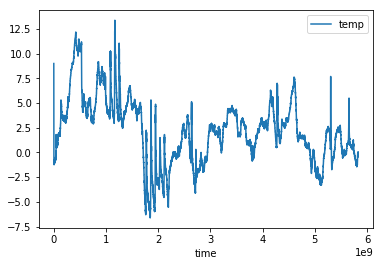

In [19]:
df1 = df[::100]
df1.plot('time','temp')

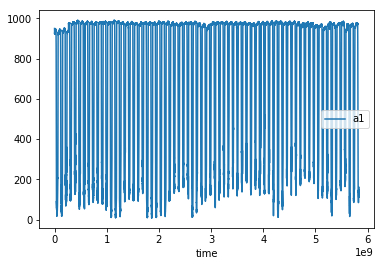

In [25]:
df1.plot('time','a1')

In [20]:
ms_in_day = 24*60*60*1000
df['day'] = df['time']//ms_in_day
df['tod'] = (df['time']%ms_in_day)/1000.0

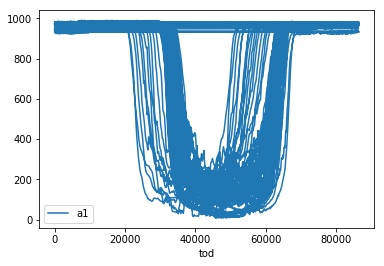

In [26]:
df1 = df[::100]
df1.plot('tod',['a1'])

In [27]:
df1.head()

,frame,time,temp,a1,temp_pres,pressure,altitude,humidity,temp_hum,day,tod
0,4,3033,9.00,950,2.3,99384,163.04,22.5,9.3,0,3.033
100,104,64483,6.69,930,1.1,99393,163.38,27.4,6.3,0,64.483
200,204,126154,4.50,929,0.2,99383,163.29,30.4,4.5,0,126.154
300,304,187938,3.19,928,-0.2,99389,163.21,32.9,3.2,0,187.938
400,404,249615,2.06,927,-0.5,99395,162.87,35.2,2.2,0,249.615


Mean lumunosity by day

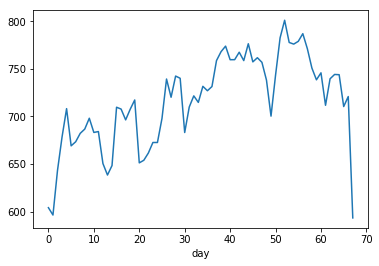

In [35]:
rs = df.groupby('day')['a1'].mean()
rs.plot()

In [49]:
24*60*60

86400

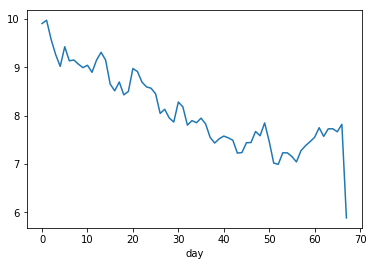

In [72]:
def daylen(f):
    mi = f[f['a1']<800]['tod'].min()
    ma = f[f['a1']<800]['tod'].max()
    return (ma-mi)/60/60

res = df.groupby('day')['tod','a1'].apply(daylen)
res.plot()

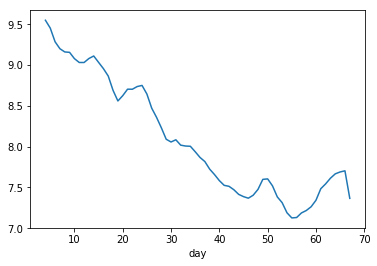

In [75]:
res.rolling(5).mean().plot()

In [89]:
df['humidity']=df['humidity'].astype(np.float32)
df['hum'] = (df['humidity']-80)/10

In [90]:
df.head()

,frame,time,temp,a1,temp_pres,pressure,altitude,humidity,temp_hum,day,tod,hum
0,4,3033,9.00,950,2.3,99384,163.04,22.5,9.3,0,3.033,-5.75
1,5,3645,9.00,951,2.3,99385,162.87,22.5,9.3,0,3.645,-5.75
2,6,4257,8.94,950,2.2,99391,162.19,22.5,9.3,0,4.257,-5.75
3,7,4869,8.94,951,2.2,99381,162.87,22.5,9.3,0,4.869,-5.75
4,8,5484,8.88,952,2.2,99379,163.55,23.9,8.9,0,5.484,-5.61


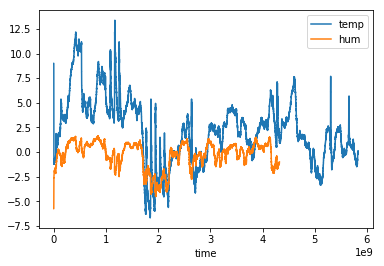

In [91]:
df.plot('time',['temp','hum'])